In [1]:
import pandas as pd
import numpy as np

from IPython.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Manushree Shah\car_prices.csv')

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.shape

(558837, 16)

In [5]:
HTML(f"<b><font color='red''>The DataFrame has {df.shape[0]} records and {df.shape[1]} features.</font></b>")

In [6]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
df.describe(include='O') # for categorical variables

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493485,558833,558837,558088,558088,558837,558825
unique,96,973,1963,87,4,550297,64,46,17,14263,3766
top,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475915,22,82945,110970,244329,19693,5334


In [9]:
df.describe(exclude='O') # for numerical variables

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [10]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [11]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [12]:
HTML(f"<b><font color='red'>There are {df['body'].nunique()} different car body in the dataset.</font></b>")

In [13]:
HTML(f"<b><font color='red'>There are {df['make'].nunique()} different car brands in the dataset.</font></b>")

In [14]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Now,for such columns like make,model or vrandname, no value can be assumed based on the mode value. Other columns which are numerical and have null values have less number of null values. So we can go haead with using model value for Transmission varaibales since it has 65K+ null values which will affect the prediction values immensely.

In [15]:
mode_value = df['transmission'].mode()[0]

# Fill null values in the "transmission" column with the mode value
df['transmission'].fillna(mode_value, inplace=True)

# Display the updated DataFrame
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [16]:
df_cleaned = df.dropna()

# Display the cleaned DataFrame
df_cleaned.shape

(533648, 16)

In [17]:
df_cleaned.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

EDA

Target variable is 'sellingprice'

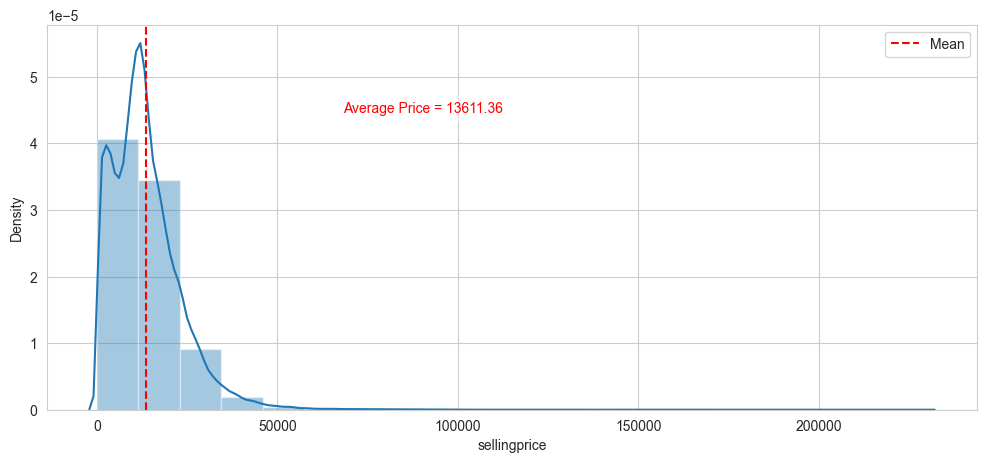

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

plotd = sns.distplot(df.sellingprice, kde=True, bins=20)

mean_line = plt.axvline(df.sellingprice.mean(), c='red', linestyle='dashed', label='Mean')

plt.text(0.49, 0.8, f'Average Price = {df.sellingprice.mean():.2f}', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white',alpha=0.5))
plt.legend()
plt.show()

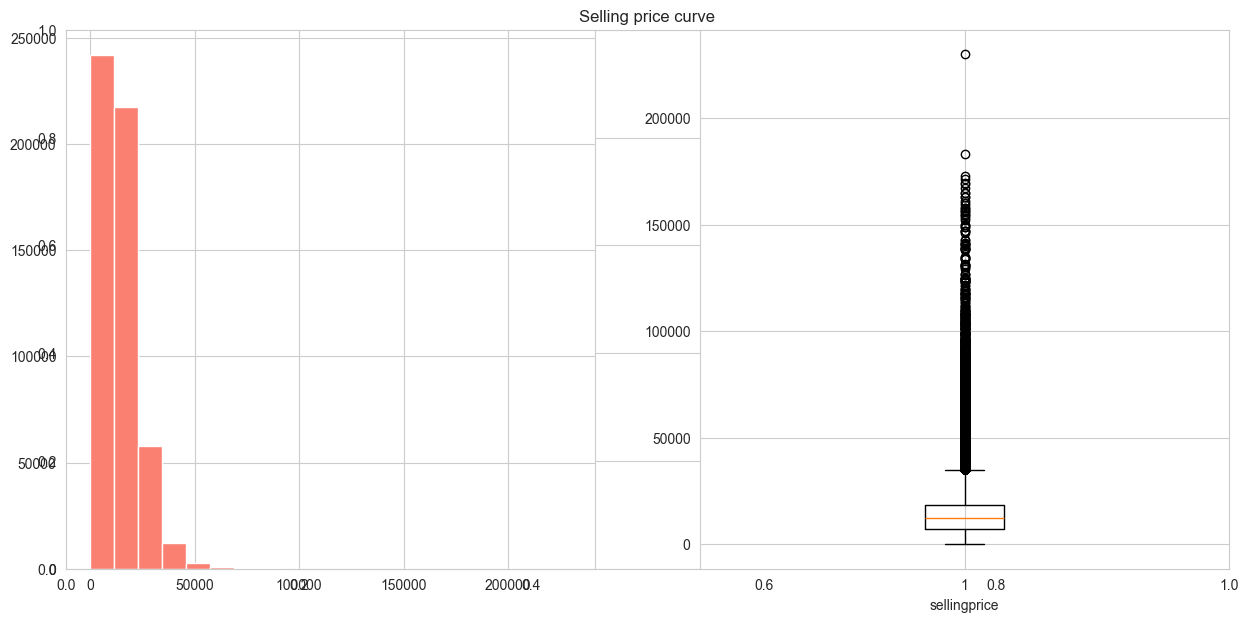

In [23]:
figs = plt.figure(figsize=(15,7))
plt.title("Selling price curve")
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = df_cleaned["sellingprice"]
plt.xlabel("sellingprice")
ax1.hist(x, bins=20, color="salmon")
ax2.boxplot(x);

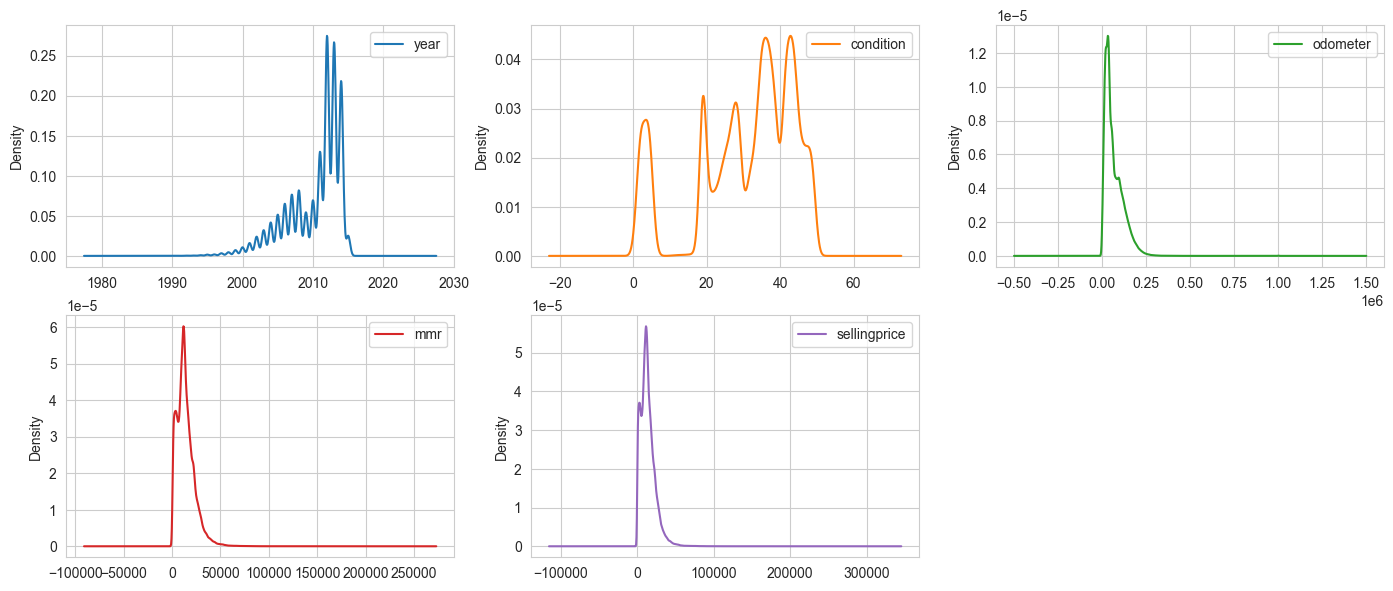

In [24]:
df_cleaned.plot(kind="density", 
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

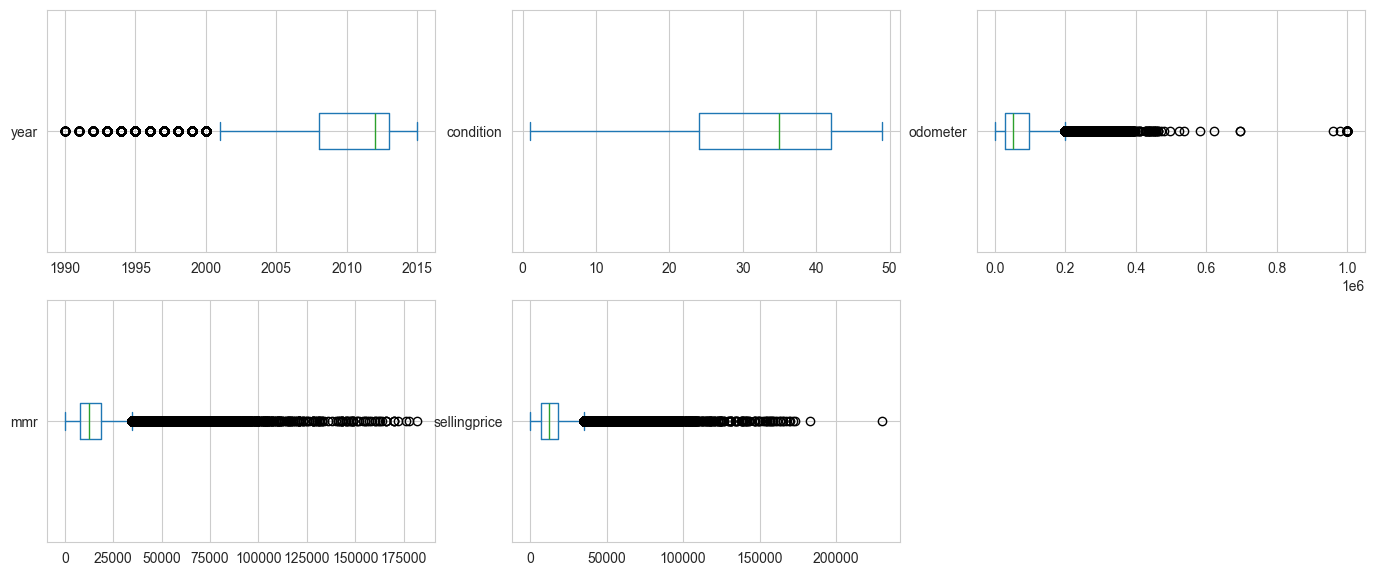

In [25]:
df_cleaned.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

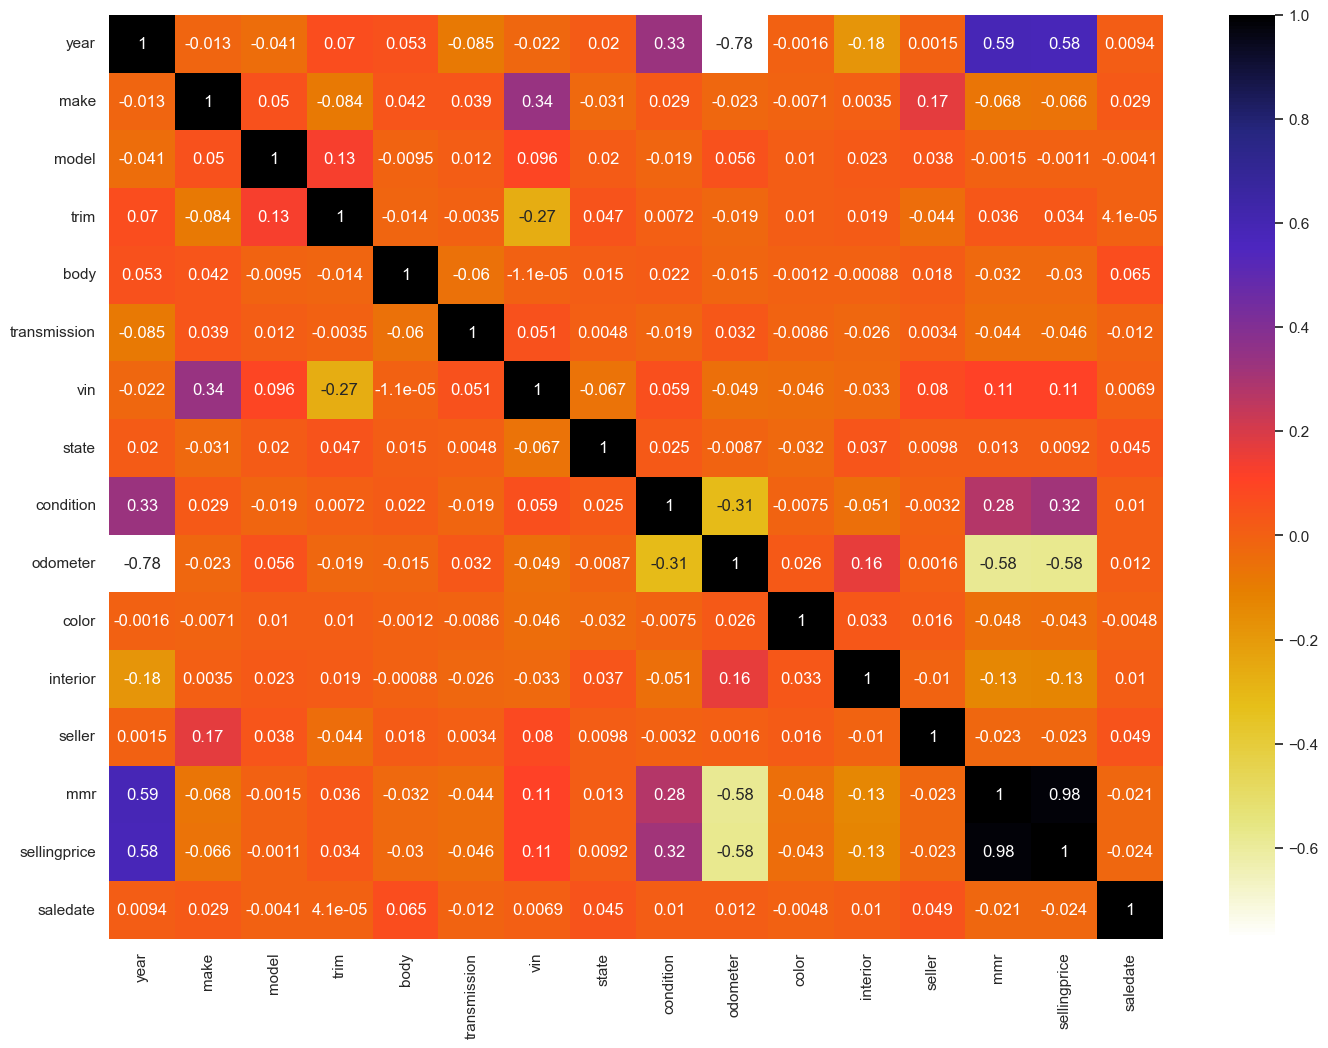

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


# Convert categorical columns to numerical labels
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Compute Cramer's V for categorical columns
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cramers_val = cramers_v(df_cleaned[col1], df_cleaned[col2])
            cramer_matrix.at[col1, col2] = cramers_val

# Compute Pearson correlation for numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
pearson_matrix = df_cleaned[numerical_columns].corr()

# Combine both correlation matrices
combined_matrix = pd.concat([pearson_matrix, cramer_matrix], axis=1)

# Plot the heatmap
plt.figure(figsize=(17, 12))
sns.set()
sns.heatmap(combined_matrix, annot=True, cmap='CMRmap_r')
plt.show()


In [31]:
df_cleaned = df_cleaned.drop(columns=['interior','seller','saledate'])
df_cleaned

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,mmr,sellingprice
0,2015,24,641,828,35,0,386073,3,5.0,16639.0,18,20500.0,21500.0
1,2015,24,641,828,35,0,386065,3,5.0,9393.0,18,20800.0,21500.0
2,2014,3,10,258,36,0,484680,3,45.0,1331.0,8,31900.0,30000.0
3,2015,51,579,1227,36,0,522157,3,41.0,14282.0,18,27500.0,27750.0
4,2014,3,35,340,36,0,485675,3,43.0,2641.0,8,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,24,374,882,36,0,467672,9,45.0,18255.0,16,35300.0,33000.0
558833,2012,41,8,939,11,0,276187,36,5.0,54393.0,18,30200.0,30800.0
558834,2012,3,726,1505,35,0,380554,3,48.0,50561.0,2,29800.0,34000.0
558835,2015,36,63,104,77,0,183673,6,38.0,16658.0,18,15100.0,11100.0


In [32]:
part1 = df_cleaned.drop(columns=['sellingprice'])
part2 = df_cleaned[['sellingprice']]
part1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,mmr
0,2015,24,641,828,35,0,386073,3,5.0,16639.0,18,20500.0
1,2015,24,641,828,35,0,386065,3,5.0,9393.0,18,20800.0
2,2014,3,10,258,36,0,484680,3,45.0,1331.0,8,31900.0
3,2015,51,579,1227,36,0,522157,3,41.0,14282.0,18,27500.0
4,2014,3,35,340,36,0,485675,3,43.0,2641.0,8,66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,24,374,882,36,0,467672,9,45.0,18255.0,16,35300.0
558833,2012,41,8,939,11,0,276187,36,5.0,54393.0,18,30200.0
558834,2012,3,726,1505,35,0,380554,3,48.0,50561.0,2,29800.0
558835,2015,36,63,104,77,0,183673,6,38.0,16658.0,18,15100.0


In [33]:
Q1 = part1.quantile(0.25)
Q3 = part1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                 5.0
make                25.0
model              333.0
trim               641.0
body                 1.0
transmission         0.0
vin             262874.5
state               23.0
condition           18.0
odometer         68068.0
color               14.0
mmr              10925.0
dtype: float64


In [35]:
# Compute quartiles
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers using IQR method
df_cleaned_iqr = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned_iqr.shape

(291998, 13)

In [36]:
df_cleaned_iqr

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,mmr,sellingprice
0,2015,24,641,828,35,0,386073,3,5.0,16639.0,18,20500.0,21500.0
1,2015,24,641,828,35,0,386065,3,5.0,9393.0,18,20800.0,21500.0
2,2014,3,10,258,36,0,484680,3,45.0,1331.0,8,31900.0,30000.0
3,2015,51,579,1227,36,0,522157,3,41.0,14282.0,18,27500.0,27750.0
5,2015,36,63,104,36,0,184293,3,1.0,5554.0,8,15350.0,10900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558827,2014,23,333,851,35,0,22982,28,42.0,25180.0,8,26000.0,24500.0
558829,2012,19,222,859,36,0,363632,28,4.0,66720.0,8,10250.0,10400.0
558830,2012,36,608,54,36,0,307145,32,26.0,35858.0,18,9950.0,10400.0
558831,2011,3,27,321,36,0,488031,5,39.0,66403.0,18,20300.0,22800.0


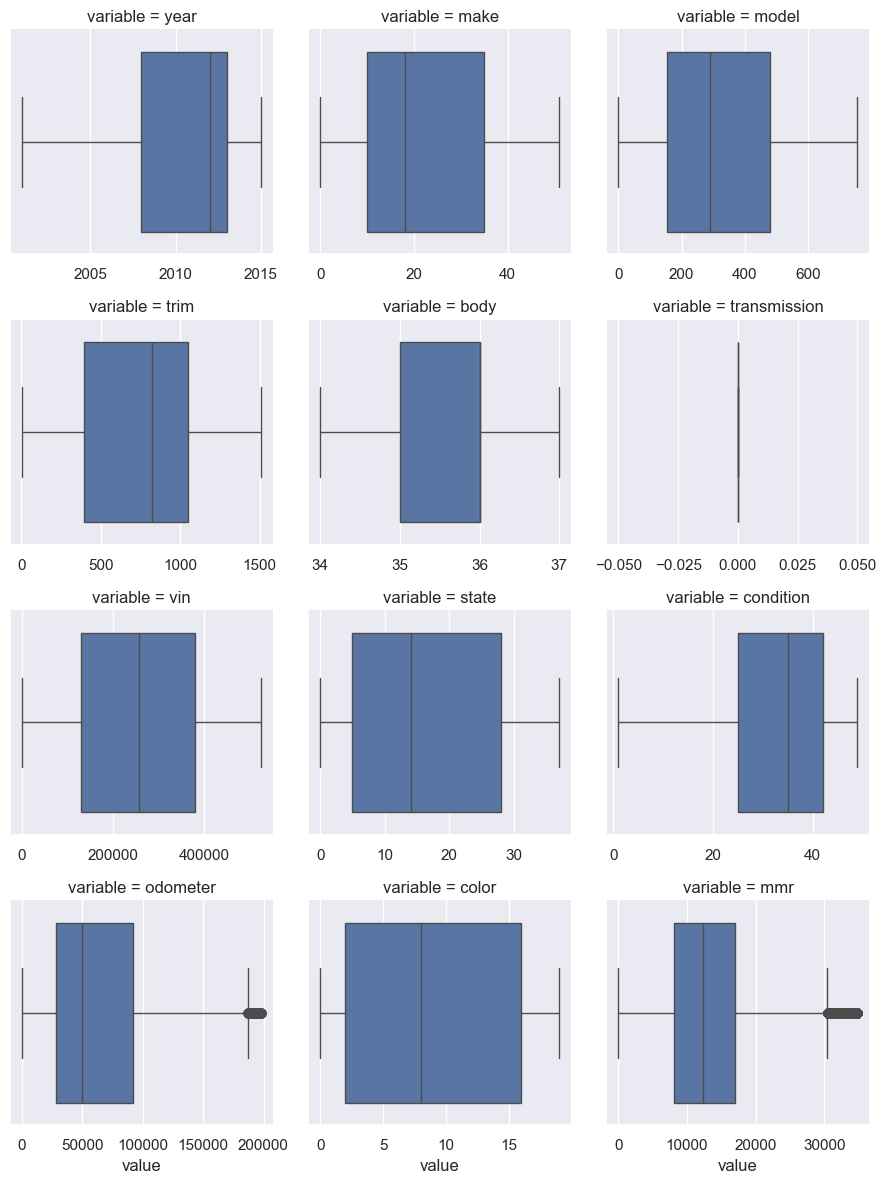

In [37]:
unpivot = pd.melt(df_cleaned_iqr, df_cleaned_iqr.describe().columns[-1], df_cleaned_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [39]:
from scipy import stats
z = np.abs(stats.zscore(df_cleaned_iqr))
print(z)

            year      make     model      trim      body  transmission  \
0       1.339294  0.138560  1.524872  0.143780  1.189502           NaN   
1       1.339294  0.138560  1.524872  0.143780  1.189502           NaN   
2       1.040763  1.339419  1.521145  1.347919  0.693609           NaN   
3       1.339294  2.038819  1.225580  1.187969  0.693609           NaN   
5       1.339294  0.983119  1.265299  1.750939  0.693609           NaN   
...          ...       ...       ...       ...       ...           ...   
558827  1.040763  0.068180  0.038068  0.203971  1.189502           NaN   
558829  0.443701  0.213340  0.497761  0.224907  0.693609           NaN   
558830  0.443701  0.983119  1.365571  1.881790  0.693609           NaN   
558831  0.145170  1.339419  1.439081  1.183047  0.693609           NaN   
558834  0.443701  1.339419  1.935191  1.915500  1.189502           NaN   

             vin     state  condition  odometer     color       mmr  \
0       0.870652  1.154584   2.004752  1

Feature Selection

In [40]:
from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

In [41]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [42]:
X = df_cleaned_iqr.drop(["sellingprice"], axis=1)
y = df_cleaned_iqr['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

Feature year: 133502.009139
Feature make: 348.885780
Feature model: 34.944973
Feature trim: 142.658139
Feature body: 8533.369227
Feature transmission: 0.000000
Feature vin: 1714.440744
Feature state: 9.723149
Feature condition: 24877.796071
Feature odometer: 140829.606505
Feature color: 411.998627
Feature mmr: 3931550.455198


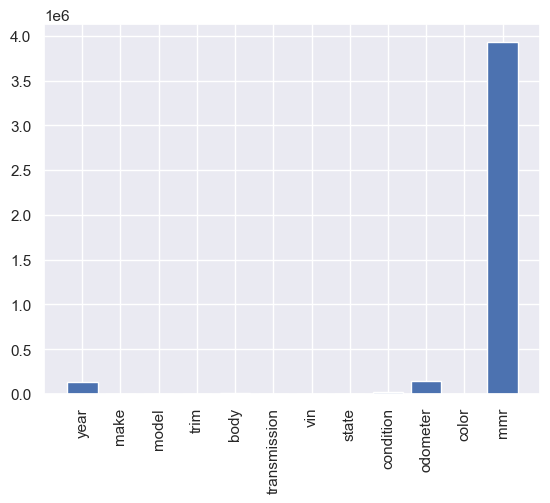

Feature year: 0.412836
Feature make: 0.180094
Feature model: 0.490589
Feature trim: 0.404482
Feature body: 0.060876
Feature transmission: 0.000236
Feature vin: 0.961593
Feature state: 0.091231
Feature condition: 0.248704
Feature odometer: 0.406638
Feature color: 0.031096
Feature mmr: 1.650838


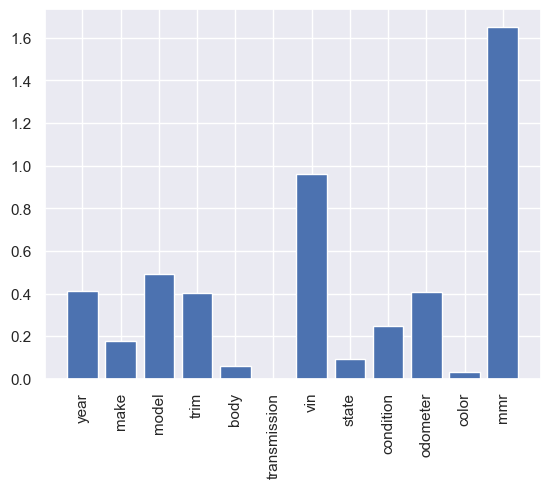

In [43]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

Modeling

In [44]:
X = df_cleaned_iqr.drop(["sellingprice"], axis=1)
y = df_cleaned_iqr['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, y_train, X_test, x=7)

LinearRegression

In [45]:
lreg = LinearRegression()

lreg.fit(X_train_fs, y_train)

yhat = lreg.predict(X_test_fs)

In [46]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 985.836
MSE: 2227362.797
RMSE: 1492.435
R-Square: 0.958


RandomForest Regression

In [49]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
yhat = rf.predict(X_test_fs)

In [50]:
mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 899.428
MSE: 1814227.659
RMSE: 1346.933
R-Square: 0.966


Decision Tree Regression

In [51]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

yhat = dtree.predict(X_test_fs)

In [52]:
mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 1264.738
MSE: 3566846.284
RMSE: 1888.610
R-Square: 0.932


XGBRegression

In [53]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

yhat = xgb.predict(X_test_fs)

In [54]:
mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_dt)
rsq_xgb = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 858.952
MSE: 1677360.240
RMSE: 1888.610
R-Square: 0.968


Model Evauation and Prediction

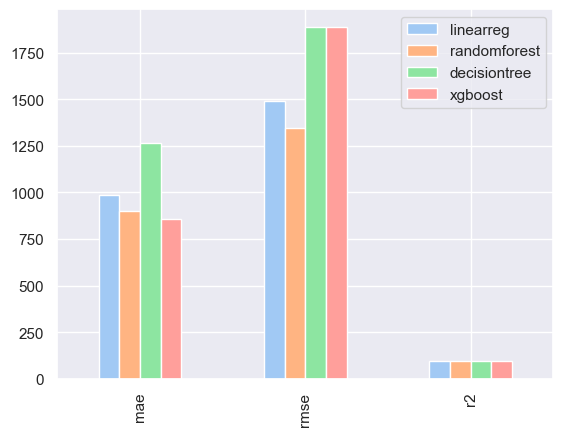

In [55]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

In [68]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

algo = [xgbt,lm,ridge,lasso,knn,rf,dtree]

result = []

for i in algo:
        start = time.process_time()
        ml_model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(round(time.process_time()-start,3)),"sec")
        
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor ✓     14.406 sec
LinearRegression ✓     0.672 sec
Ridge ✓     0.141 sec
Lasso ✓     0.312 sec
KNeighborsRegressor ✓     8.609 sec
RandomForestRegressor ✓     139.062 sec
DecisionTreeRegressor ✓     2.031 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
XGBRegressor_baseline,0.973756,0.969801,1178.529132,1261.285814,788.037256,827.270488
RandomForestRegressor_baseline,0.995305,0.966961,498.468293,1319.255305,325.767216,872.874899
Lasso_baseline,0.957333,0.957815,1502.698534,1490.710453,987.701166,984.327594
Ridge_baseline,0.957333,0.957815,1502.696968,1490.710786,987.712140,984.342061
LinearRegression_baseline,0.957333,0.957815,1502.696968,1490.710786,987.712143,984.342065
KNeighborsRegressor_baseline,0.963135,0.944311,1396.794142,1712.771327,960.144161,1177.070540
DecisionTreeRegressor_baseline,1.000000,0.933887,0.000000,1866.197836,0.000000,1256.136395


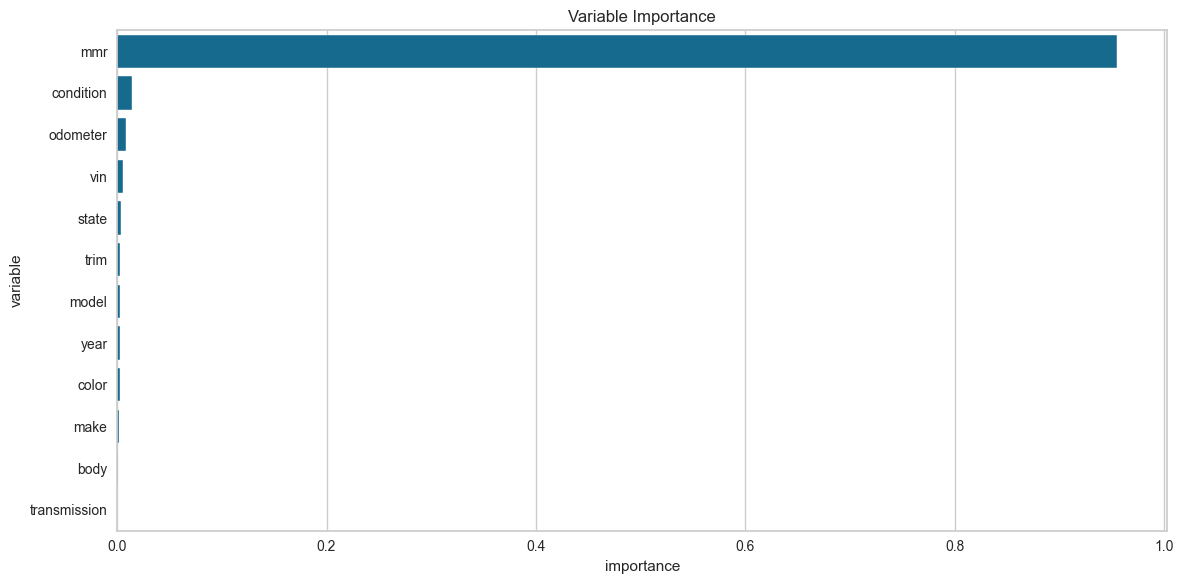

In [69]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(x="importance",
            y="variable",
            data=importance)
plt.title('Variable Importance')
plt.tight_layout()

In [72]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
import statsmodels.api as sm

import pickle
import warnings
warnings.filterwarnings("ignore")

# Custom Transformer for Feature Engineering
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):  # for p value
        self.selected_features = None  # Initialize selected features

    def fit(self, X, y=None):
        # Feature Selection & Multicollinearity
        X = X.select_dtypes(exclude="O")
        # del X["car_ID"]

        rfe = RFE(LinearRegression(), n_features_to_select=12)
        rfe = rfe.fit(X, y)
        
        X = X[X.columns[rfe.support_]]

        # Feature Selection & t - Test
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        significant_vars = p_values[p_values <= 0.05].index
        self.selected_features = significant_vars
        return self

    def transform(self, X):
        return X[self.selected_features]

# Pipeline
pipeline = Pipeline([
    ('feature_engineering', FeatureEngineering()),
    ('scaling', MinMaxScaler()),
    ('model', LinearRegression())
])

# Importing data and split test train

# Test & Train
X = df_cleaned.drop('sellingprice', axis=1)
y = df_cleaned[['sellingprice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_engineering', FeatureEngineering()),
                ('scaling', MinMaxScaler()), ('model', LinearRegression())])

In [73]:
# Prediction on the test set
predictions = pipeline.predict(X_test)
predictions[0:5]

array([[ 9981.64140503],
       [20066.3818621 ],
       [22886.9325209 ],
       [12219.02847241],
       [20195.98035074]])

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1044.6459880382847
Mean Squared Error: 2669712.7318544593
R-squared: 0.9711746168855533


In [75]:
# Save model to a pickle file
with open('local_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

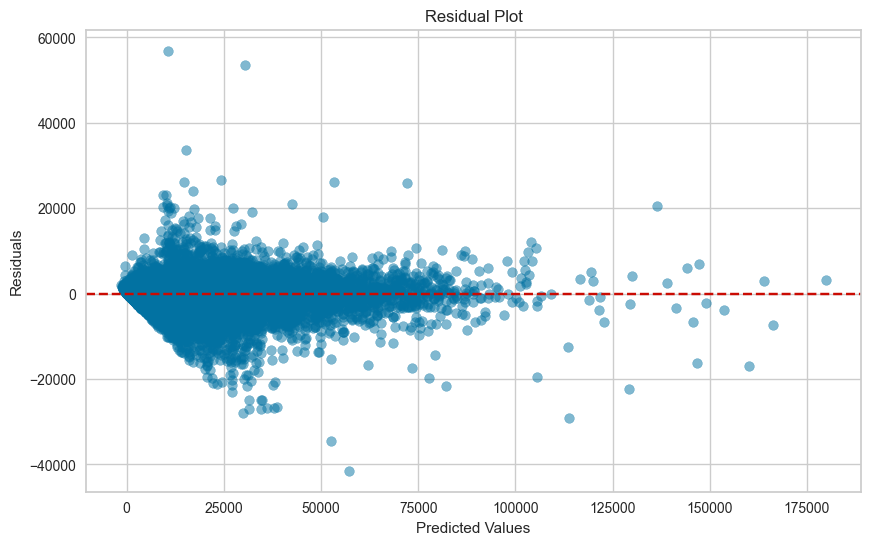

In [76]:
import matplotlib.pyplot as plt

# Make predictions using the fitted pipeline
predictions = pipeline.predict(X_test)

# Calculate residuals
residuals = y_test.values.flatten() - predictions.flatten()


plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

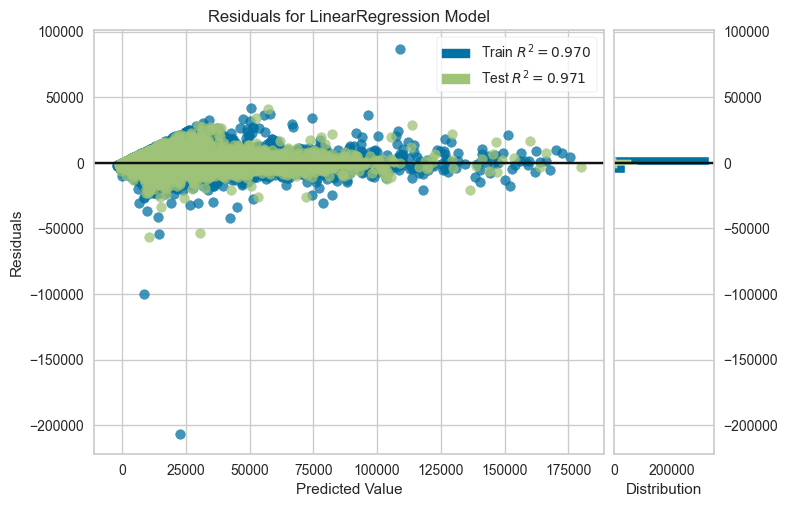

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
